In [45]:
import pandas as pd
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
class Survivors:

      
    def __init__(self, path):
        self.df = pd.read_csv(path)

    # метод отбора уцникальных значений для столюцов
    def unique_count(self):

        for col in self.df.columns:
            unique_count: int = self.df[col].nunique()  # Количество уникальных значений для каждого столбца
            unique_values: List = self.df[col].unique().tolist()  # Список уникальных значений для каждого столбца
            
            # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять числовые поля)
            is_numeric: bool = pd.to_numeric(self.df[col], errors='coerce').notnull().all()
            
            if is_numeric:
                print(f"Столбец '{col}': уникальных значений {unique_count} — цифровые значения")
            else:
                print(f"Столбец '{col}': уникальных значений {unique_count} — {unique_values[:5]}")

    

In [27]:

survivors = Survivors('content/train.csv')

In [28]:
survivors.df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
survivors.df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# Проверим на уникальные данные и систематизируем их
survivors.unique_count()


Столбец 'PassengerId': уникальных значений 891 — цифровые значения
Столбец 'Survived': уникальных значений 2 — цифровые значения
Столбец 'Pclass': уникальных значений 3 — цифровые значения
Столбец 'Name': уникальных значений 891 — ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry']
Столбец 'Sex': уникальных значений 2 — ['male', 'female']
Столбец 'Age': уникальных значений 88 — [22.0, 38.0, 26.0, 35.0, nan]
Столбец 'SibSp': уникальных значений 7 — цифровые значения
Столбец 'Parch': уникальных значений 7 — цифровые значения
Столбец 'Ticket': уникальных значений 681 — ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450']
Столбец 'Fare': уникальных значений 248 — цифровые значения
Столбец 'Cabin': уникальных значений 147 — [nan, 'C85', 'C123', 'E46', 'G6']
Столбец 'Embarked': уникальных значений 3 — ['S', 'C', 'Q', nan]


In [39]:
survivors.df[['Survived' ,'Pclass']].groupby(['Survived']).describe()

Pclass                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0

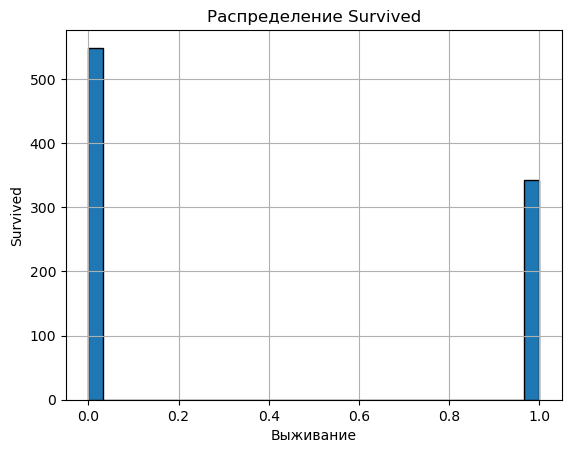

In [59]:
survivors.df['Survived'].hist(bins=30, edgecolor='black')
plt.title('Распределение Survived')
plt.xlabel('Выживание')
plt.ylabel('Survived')
plt.show() 

In [47]:
survivors.df[['Survived' ,'Pclass']].groupby(['Pclass']).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [55]:
filtered_df = survivors.df[(survivors.df['Survived'] == 1)]

filtered_df[['Survived' ,'Pclass']].groupby(['Pclass']).describe()

Survived                                   
          count mean  std  min  25%  50%  75%  max
Pclass                                            
1         136.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2          87.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
3         119.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

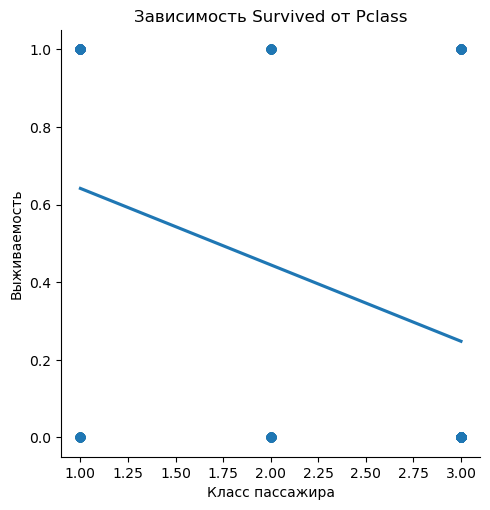

In [46]:
sns.lmplot(data=survivors.df, x='Pclass', y='Survived', ci=None, scatter_kws={'alpha':0.7})
plt.title('Зависимость Survived от Pclass')
plt.xlabel('Класс пассажира')
plt.ylabel('Выживаемость')
plt.show()

# Вывод. Исходя из графика и процентного расчета кол-ва выживших можно сделать вывод - выживаемость находится в линейной зависимости от класса пассажира. И чем ниже класс тем ниже выживаемость.

In [56]:
survivors.df[['Survived' ,'Sex']].groupby(['Survived']).describe()

Sex                    
         count unique     top freq
Survived                          
0          549      2    male  468
1          342      2  female  233

In [57]:
survivors.df[['Survived' ,'Sex']].groupby(['Sex']).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [63]:
survivors.df[['Survived' ,'Age']].groupby(['Survived']).describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

In [66]:
survivors.df[['Survived' ,'Embarked']].groupby(['Survived']).describe()

Embarked                
            count unique top freq
Survived                         
0             549      3   S  427
1             340      3   S  217

In [67]:
survivors.df[['Survived' ,'Embarked']].groupby(['Embarked']).describe()

Survived                                             
            count      mean       std  min  25%  50%  75%  max
Embarked                                                      
C           168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Q            77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S           644.0  0.336957  0.473037  0.0  0.0  0.0  1.0  1.0